# Simple test of compressed sensing methods

In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

from scipy.linalg import hadamard
import scipy

In [2]:
m = 500
n = 1000
Amat = np.random.normal(0,1, (m,n))
# instead of A = LinearTransform(Amat)
A = scipy.sparse.linalg.aslinearoperator(Amat)
k = 100
r = 20
HTs = Sparsity(k)
HTr = FixedRank(r)

In [3]:
x_true = np.random.normal(0,1, (n, 1)) / np.sqrt(n)
sub, x_true = HTs.project(x_true)
b = A.matvec(x_true)
problem = LinearProblem(A, b, HTs, x_true = x_true)

In [7]:
solver = NIHT(logverbosity = 2)
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm	     xdist
    1	+9.9219529334090903e+07	6.02065766e+05
Terminated - max time reached after 1 iterations.



In [8]:
np.linalg.norm(x - x_true, 2)/ np.linalg.norm(x_true, 2)

346.85496053602895

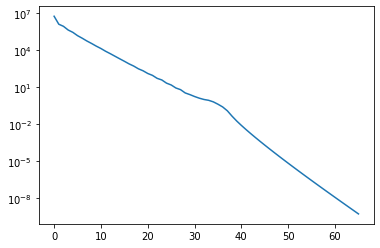

In [6]:
plt.semilogy(opt_log['iterations']['fx'] / np.linalg.norm(b))